In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import warnings
from math import exp
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import scale
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Ignore warning messages.
warnings.filterwarnings("ignore") 

# Read data from the csv file and convert it into a dataframe.
df = pd.read_csv('train.csv')

df.head()

,seq_id,protein_sequence,pH,data_source,tm
0,0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,doi.org/10.1038/s41592-020-0801-4,75.7
1,1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,doi.org/10.1038/s41592-020-0801-4,50.5
2,2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,doi.org/10.1038/s41592-020-0801-4,40.5
3,3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,doi.org/10.1038/s41592-020-0801-4,47.2
4,4,AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...,7.0,doi.org/10.1038/s41592-020-0801-4,49.5


# Novoenzymes Dataset Analysis #

Here we are taking a look at the dataset retrieved from Kaggle.The dataset was retreived from multiple research articles with the DOI provided in the dataset. The purpose of this dataset from Kaggle was to predict a ranking of protein stability at different temperatures(tm) and at different levels of pH. What we want from this dataset is the values of protein stability and the different factors that affect it.

Our goal is to use machine learning to analyze generic enzyme effect and production. With the data we are using in mind, we want to take a look at 'tm' from the data. 'tm' represents the melting point of the protein and therefore, the higher the 'tm' the more stable the protein and the more efficient the enzyme produced it (<u>can include a reference to support this statement... otherwise, with the dataset we are using, what is the correlation between pH and enzyme production?</u>).

The dataset also contains pH levels. This is the factor that we want to focus on. Does the pH value effect the production of the enzyme? We continue the analysis by first removing the dataset we do not need from the dataframe i.e. protein_sequence & data_source. Then we shorten the range we are looking at (to avoid the extreme values) and lessen the pH levels to at most 12. From there we can graph the filtered dataframe.

In [2]:
#Dropping labels that we do not need to look at (protein_sequence and data_source)
df.drop(labels = ['protein_sequence', 'data_source'], axis = 1, inplace = True)

In [3]:
#Looking at the first 5 data points after filtering the dataframe to make sure the columns were dropped
df.head()

,seq_id,pH,tm
0,0,7.0,75.7
1,1,7.0,50.5
2,2,7.0,40.5
3,3,7.0,47.2
4,4,7.0,49.5


In [4]:
#Looking at all the points under column 'pH' that are <= 12
#Assigning the filtered dataframe as df2
df= df[df['pH']<=12]

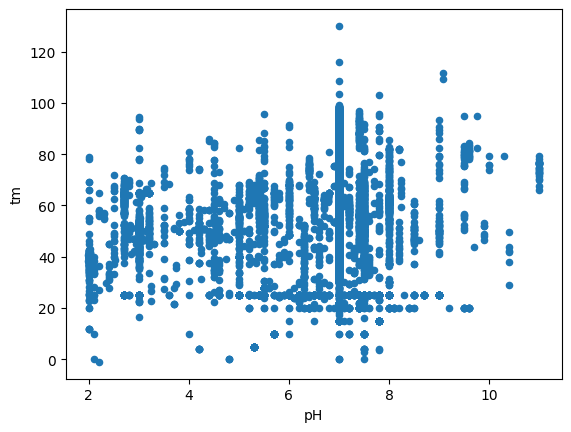

In [5]:
#Plotting pH vs. tm in order to get a better look at the data
df.plot(kind = 'scatter', x = 'pH', y = 'tm')
plt.show()

#### Description of Plot Above ####
tm stands for 'melting point'. The higher the tm the more stable the protein variant (Kaggle).

From this plot of a pH vs. tm we can see that the highest tm value (the highest melting point and therefore the most stable protein variant) rests at about pH = 7. We can also see that the amount of protein produced lies at pH 7 as well. Not only can we see at what pH levels produces the most stable proteins, we can see that most of the proteins that were produced lie at around pH 7.<u>Include a scientific article of reference to support the statement above</u>

## Creating the Machine Learning Model ##

Duplicate rows can corrupt or even alter the data. Is better to remove it to anaylze the data more accurately (eg. A duplicated row has twice the weight when a regression algoeithm is applied).

Before predicting values with the machine learning model, we also want to make sure that our model is accurate. To determine if our model is accurate, we will use a train-test split. With the differenet machine learning algorithms that we will use, each will have its own train-test split to determine how accurate the model works. 

From there we can determine, when considering the specific parameters(pH, temerature, solute concentration, etc.), the model that best fits how enzyme production.

In [6]:
#Counting the amount of duplicate rows
sum(df.duplicated())

0

In [7]:
#Splitting the dataframe into input and output data
y = df['pH']
X = df.iloc[:, df.columns != 'pH']


In [8]:
#Preparation for a train-test split to evaluate the machine learning algorithm
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

#Because we separated the input and output previously, if scale them separately
#it can cause inaccurate results. The code below addresses the issue
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

In [9]:
#Testing Linear Regression Model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train)

train_accuracy = model.score(X_train_scaled, y_train)
print(f'The accuracy for the training set is {100 * train_accuracy:.2f}%')

test_accuracy = model.score(X_test_scaled, y_test)
print(f'The accuracy for the test set is {100 * test_accuracy:.2f}%')


The accuracy for the training set is 0.52%
The accuracy for the test set is 0.48%


In [19]:
#Testing SVR Regression Model
from sklearn.svm import SVR

model = SVR(kernel ='rbf')
model.fit(X_train_scaled, y_train)

train_accuracy = model.score(X_train_scaled, y_train)
print(f'The accuracy for the training set is {100 * train_accuracy:.2f}%')

test_accuracy = model.score(X_test_scaled, y_test)
print(f'The accuracy for the test set is {100 * test_accuracy:.2f}%')

print("With an input of seqID & tm, the predicted pH is...", model.predict([[0,0]]))

The accuracy for the training set is 1.21%
The accuracy for the test set is 1.08%
With an input of pH 8 the predicted tm value is... [6.95570603]


In [12]:
#Testing Ridge Regression Model
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold

model = Ridge()
model.fit(X_train_scaled, y_train)

train_accuracy = model.score(X_train_scaled, y_train)
print(f'The accuracy for the training set is {100 * train_accuracy:.2f}%')

test_accuracy = model.score(X_test_scaled, y_test)
print(f'The accuracy for the test set is {100 * test_accuracy:.2f}%')

The accuracy for the training set is 0.52%
The accuracy for the test set is 0.48%
